In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv("diabetesdataset.csv")
dataset.tail()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,80.0,0,0,27.32,6.2,90,0
99996,2.0,0,0,17.37,6.5,100,0
99997,66.0,0,0,27.83,5.7,155,0
99998,24.0,0,0,35.42,4.0,100,0
99999,57.0,0,0,22.43,6.6,90,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   bmi                  100000 non-null  float64
 4   HbA1c_level          100000 non-null  float64
 5   blood_glucose_level  100000 non-null  int64  
 6   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 5.3 MB


In [4]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Text(0.5, 1.0, 'correlation heatmap')

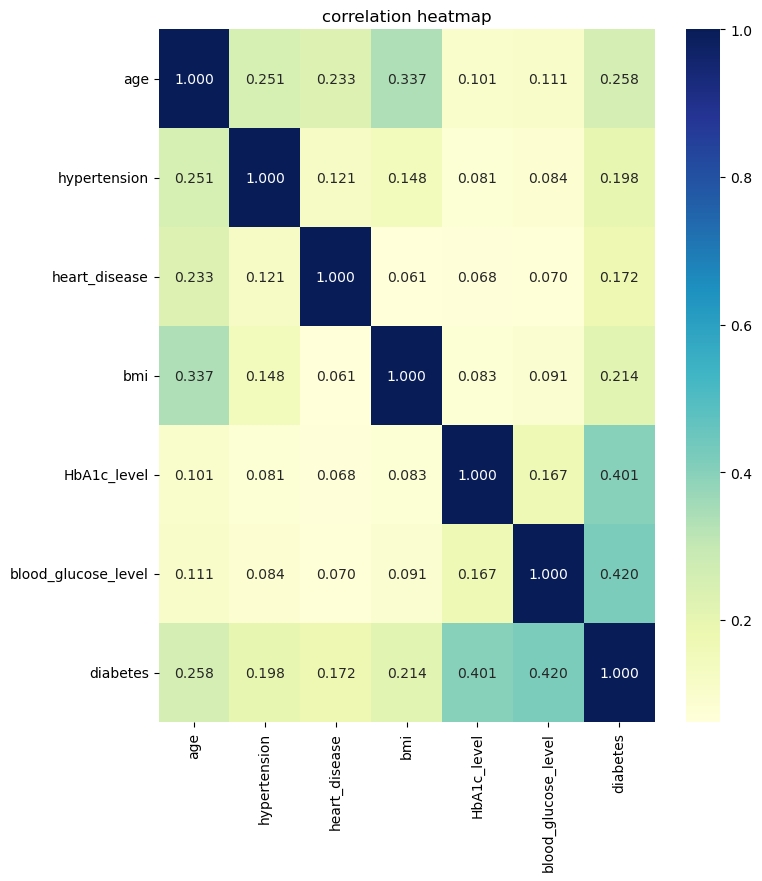

In [5]:
  #correalation plot of independent variable
plt.figure(figsize=(8,9))
sns.heatmap(dataset.corr(), annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("correlation heatmap")

C:\Users\USER\AppData\Local\Temp\ipykernel_5060\781311080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde=sns.kdeplot(dataset["hypertension"][dataset["diabetes"]==1], color="red", shade=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_5060\781311080.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde=sns.kdeplot(dataset["hypertension"][dataset["diabetes"]==0], color="Blue", shade=True)


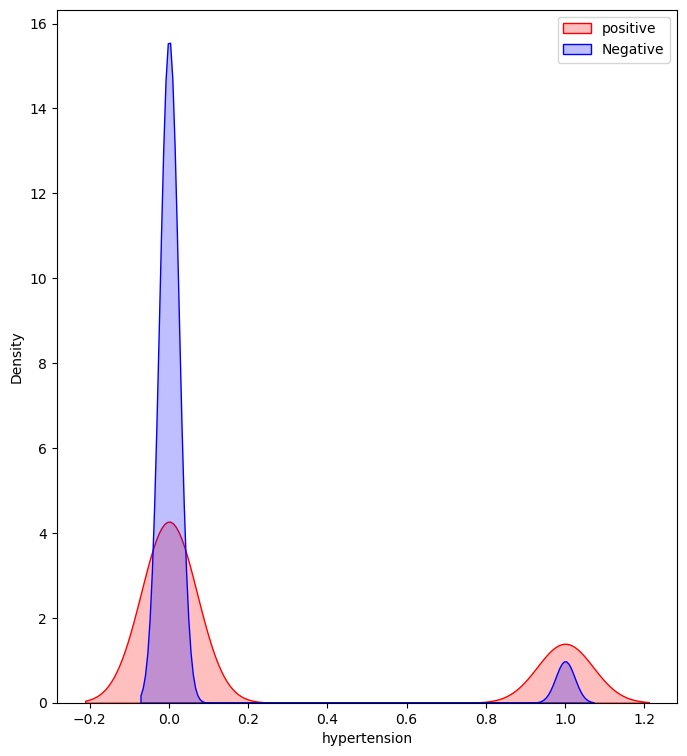

In [6]:
#exploring hypertension and target variables
plt.figure(figsize=(8,9))
kde=sns.kdeplot(dataset["hypertension"][dataset["diabetes"]==1], color="red", shade=True)
kde=sns.kdeplot(dataset["hypertension"][dataset["diabetes"]==0], color="Blue", shade=True)
kde.set_xlabel("hypertension")
kde.set_ylabel("Density")
kde.legend(["positive", "Negative"])

<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

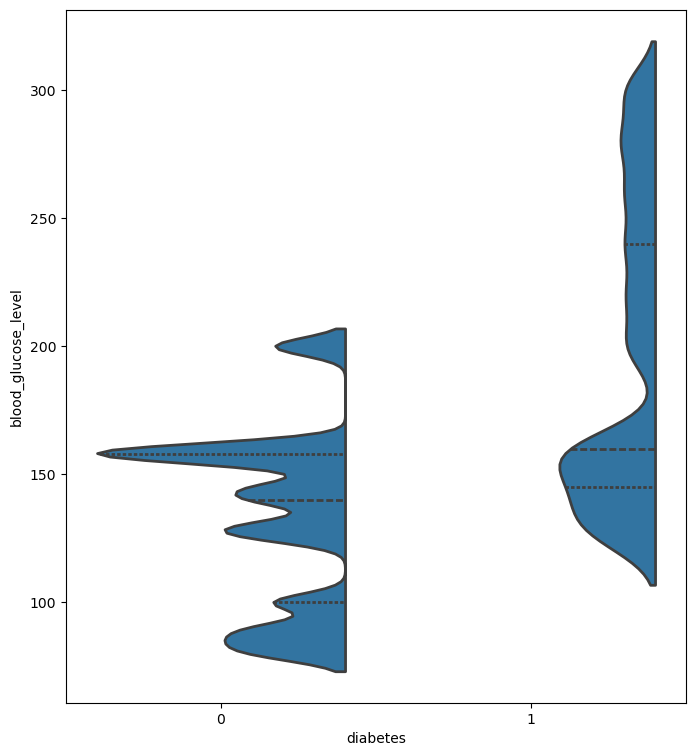

In [7]:
#exploring blood glucose level
plt.figure(figsize=(8,9))
sns.violinplot(data=dataset,x="diabetes", y="blood_glucose_level", split=True, linewidth=2, inner="quart")

C:\Users\USER\AppData\Local\Temp\ipykernel_5060\1795924827.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde=sns.kdeplot(dataset["blood_glucose_level"][dataset["diabetes"]==1], color="red", shade=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_5060\1795924827.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde=sns.kdeplot(dataset["blood_glucose_level"][dataset["diabetes"]==0], color="Blue", shade=True)


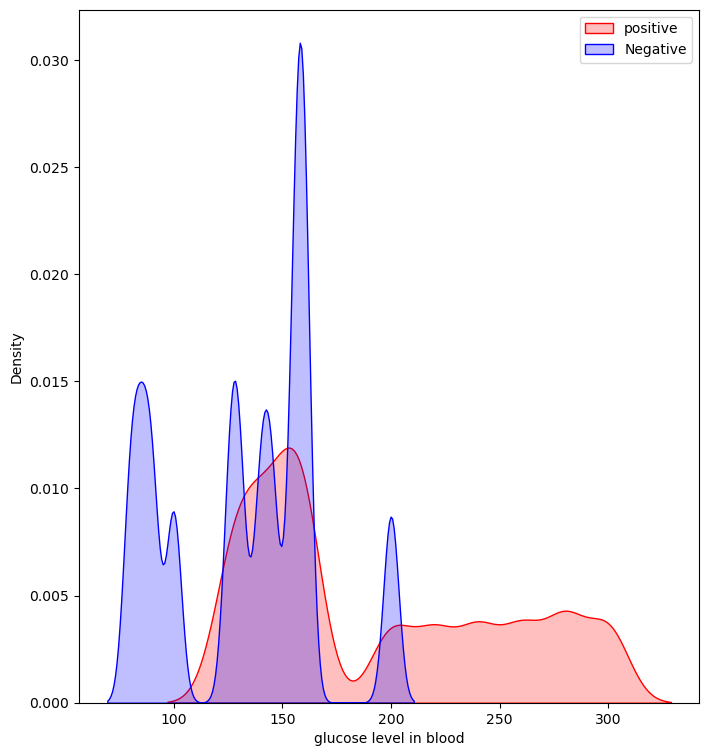

In [8]:
plt.figure(figsize=(8,9))
kde=sns.kdeplot(dataset["blood_glucose_level"][dataset["diabetes"]==1], color="red", shade=True)
kde=sns.kdeplot(dataset["blood_glucose_level"][dataset["diabetes"]==0], color="Blue", shade=True)
kde.set_xlabel("glucose level in blood")
kde.set_ylabel("Density")
kde.legend(["positive", "Negative"])

In [9]:
 #replacing zero values with the mean or median of the respective feature
#glucose level in blood
dataset["blood_glucose_level"]= dataset["blood_glucose_level"].replace(0, dataset["blood_glucose_level"].median())
#bmi
dataset["bmi"]= dataset["bmi"].replace(0, dataset["bmi"].median())
#HbA1c_level
dataset["HbA1c_level"]= dataset["HbA1c_level"].replace(0, dataset["HbA1c_level"].median())
#herat_disease
dataset["heart_disease"]= dataset["heart_disease"].replace(0, dataset["heart_disease"].mean())
#hypertension
dataset["hypertension"]=dataset["hypertension"].replace(0, dataset["hypertension"].mean())

In [10]:
dataset

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0.07485,1.00000,25.19,6.6,140,0
1,54.0,0.07485,0.03942,27.32,6.6,80,0
2,28.0,0.07485,0.03942,27.32,5.7,158,0
3,36.0,0.07485,0.03942,23.45,5.0,155,0
4,76.0,1.00000,1.00000,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,80.0,0.07485,0.03942,27.32,6.2,90,0
99996,2.0,0.07485,0.03942,17.37,6.5,100,0
99997,66.0,0.07485,0.03942,27.83,5.7,155,0
99998,24.0,0.07485,0.03942,35.42,4.0,100,0


In [11]:
#splitting the dependent and independent variables or features
X=dataset.drop(["diabetes"], axis = 1)
Y=dataset["diabetes"]

In [12]:
#splitting the dataset into training nad testing
from sklearn.model_selection import train_test_split

In [13]:
X_train,  X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.33, random_state=43)

In [14]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [114]:
training_accuracy=[]
test_accuracy=[]
for n_neighbors in range (1,11):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,Y_train)
    #check accuracyscore
    training_accuracy.append(knn.score(X_train, Y_train))
    test_accuracy.append(knn.score(X_test, Y_test))
    
    

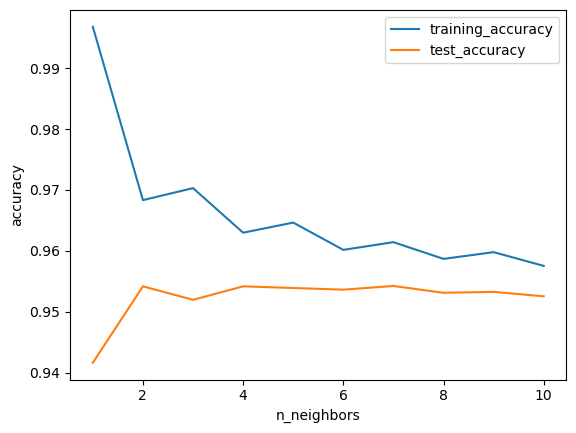

In [116]:
plt.plot(range(1,11), training_accuracy, label = "training_accuracy")
plt.plot(range(1,11), test_accuracy, label= "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [124]:
 knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train)
print(knn.score(X_train,Y_train), ": training_accuracy")
print(knn.score(X_test,Y_test), ": test_accuracy")

0.9597910447761194 : training_accuracy
0.9532727272727273 : test_accuracy


In [130]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train,Y_train)
print(dt.score(X_train,Y_train), ": training_accuracy")
print(dt.score(X_test,Y_test), ": test_accuracy")


0.9974328358208955 : training_accuracy
0.9522121212121212 : test_accuracy


In [134]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0, max_depth=3)
dt.fit(X_train,Y_train)
print(dt.score(X_train,Y_train), ": training_accuracy")
print(dt.score(X_test,Y_test), ": test_accuracy")


0.9720597014925373 : training_accuracy
0.9714848484848485 : test_accuracy
